# Utility

In [1]:
from acados_tool.plotFcn import *
import numpy as np

def plot_traj(traj_actual, time_actual, opt):
    if (opt==1):
        plotTrackProj(traj_actual[:], opt=opt, vel=True, whole=True)
    elif (opt==2):
        plotTrackProj(traj_actual[:-3], opt=opt, vel=True, whole=True)
        
    if (opt==1):
        map_name = 'LMS_Track.txt'
    elif (opt==2):
        map_name = 'bigger_track.txt'

    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += (int)(time_actual[i][1])
        x,y,_,_ = transformProj2Orig(traj_actual[step][0],traj_actual[step][1],0,0,map_name)
        print(x,y)
        plt.plot(x,y,"go",markersize=12, alpha=.5)
        
def calc_info(traj_actual, time_actual):
    plt.figure()

    prog_t = []
    calc_t = []
    diff_t = []
    progress = []
    iter_num = []
    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += time_actual[i][1]
        progress += [traj_actual[(int)(step)][0]]

        prog_t += [time_actual[i][2]]
        calc_t += [time_actual[i][0]]
        diff_t += [time_actual[i][2]-time_actual[i][0]]
        iter_num += [time_actual[i][3]]


    plt.plot(prog_t[1:], 'gx')
    plt.plot(calc_t[1:], 'bx')
    plt.show()

    plt.plot(prog_t[1:], 'gx-', label='progress time')
    plt.plot(calc_t[1:], 'bx-', label='NMPC recalculation time')
    plt.xlabel('The release point of the NMPC recalculation result')
    plt.ylabel('Time [ms]')
    plt.legend()
    plt.show()

    plt.plot(diff_t[1:], 'bx')
    plt.plot([0,8],[0,0], 'r')
    plt.show()

    n, bins, patches = plt.hist(diff_t[1:], 5, facecolor='blue', alpha=0.5, rwidth=0.9)
    plt.xlabel('Progress time minus Calculation time at each step [ms]')
    plt.ylabel('Count')
    plt.title('Histogram')
    plt.show()

    print("prog_t max: ", max(prog_t[1:]), " - min: ", min(prog_t[1:]), " - avg: ", np.mean(prog_t[1:]))
    print("calc_t max: ", max(calc_t[1:]), " - min: ", min(calc_t[1:]), " - avg: ", np.mean(calc_t[1:]))
    print("iter_num max: ", max(iter_num[1:]), " - min: ", min(iter_num[1:]), " - avg: ", np.mean(iter_num[1:]))
    
    return prog_t, calc_t, diff_t, iter_num

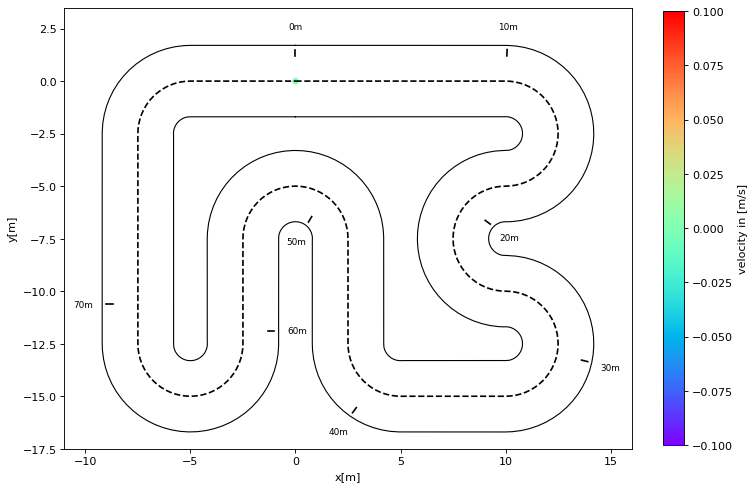

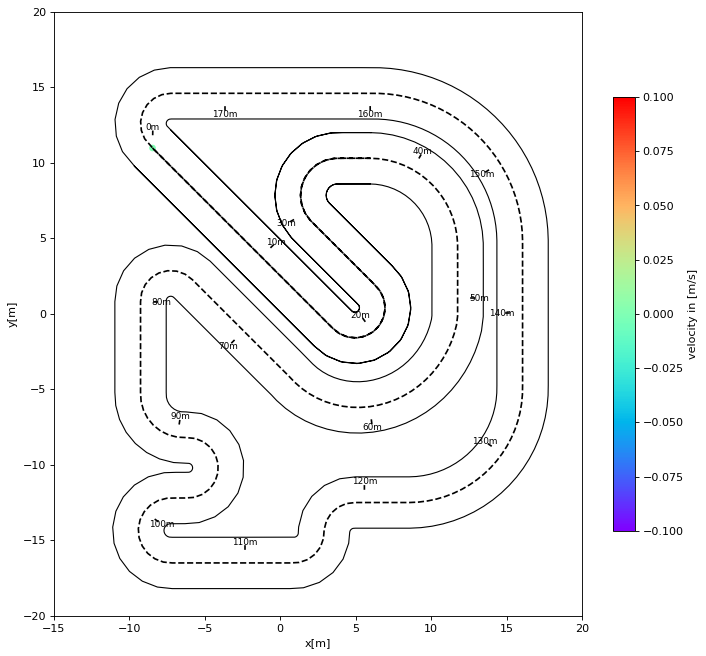

In [2]:
traj_actual = np.loadtxt("../result/triggering/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track1/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plotTrackProj(np.zeros((1,7)), opt=1, vel=True, whole=True)
plotTrackProj(np.zeros((1,7)), opt=2, vel=True, whole=True)

# Track 1

[0.] [0.]
[6.] [-0.240747]
[11.19541228] [-2.43852507]
[8.80648659] [-7.38772981]
[9.10340917] [-8.52936544]
[10.68833989] [-10.79746137]
[11.13756642] [-12.89305925]
[7.85248327] [-14.219823]
[3.17158002] [-11.47789801]
[1.37310641] [-6.94136004]
[-2.048614] [-8.57127551]
[-4.88213515] [-13.69890936]
[-5.90012858] [-13.30728888]
[-7.065577] [-10.47955606]
[-6.75064358] [-2.71658266]
[-1.90497025] [-0.76677197]


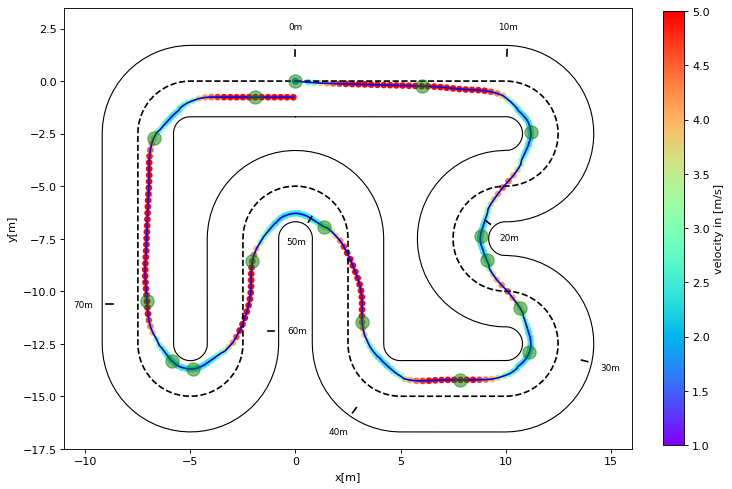

In [3]:
traj_actual = np.loadtxt("../result/triggering/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track1/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plot_traj(traj_actual, time_actual, 1)

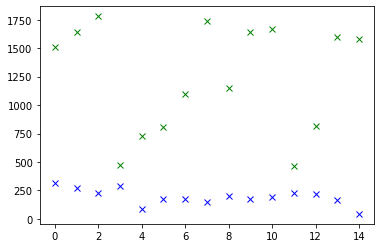

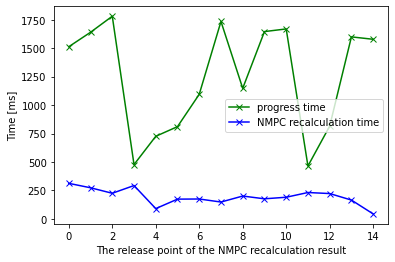

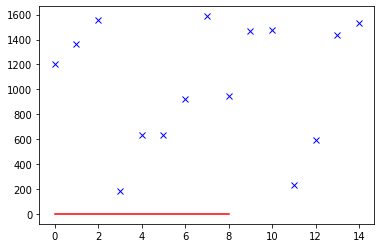

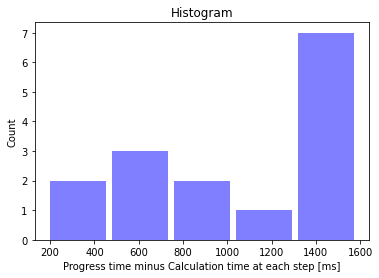

prog_t max:  1780.6307  - min:  464.38287  - avg:  1246.2263
calc_t max:  311.896  - min:  43.204  - avg:  194.33006
iter_num max:  16.0  - min:  5.0  - avg:  11.4


In [4]:
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual)

## reach iter max

In [5]:
[print("step: ", i, ", iter num: ", e, ", KKT: ", time_actual[i][-1]) for i, e in enumerate(iter_num) if e > 15]
print("TOTAL recal num: ", time_actual.shape[0])
print("TOTAL computation time: ", sum(time_actual[:,0]))
print("lap time: ", traj_actual[-1])

step:  4 , iter num:  16.0 , KKT:  16.0
TOTAL recal num:  17
TOTAL computation time:  3419.122943878174
lap time:  [ 8.7000000e+01 -7.7047002e-01 -4.7909999e-03  5.0000000e+00
 -0.0000000e+00  6.0149999e-03  1.9053398e+01]


# Track 2

[-8.45743] [10.97901]
[-5.04623617] [7.60197357]
[-4.20139881] [6.74976119]
[-0.4594867] [3.27918281]
[0.43180544] [2.47342023]
[4.13787482] [-0.32534632]
[5.47444139] [-0.09548075]
[5.7245714] [1.82837841]
[4.91335467] [3.13846645]
[2.92519819] [8.60431253]
[4.09849398] [9.44294526]
[6.98958714] [8.87276262]
[10.44899436] [4.30103612]
[9.91293368] [-1.85959604]
[9.27574428] [-2.83698875]
[3.71515502] [-4.69220854]
[2.56551148] [-4.22935934]
[-0.4885849] [-3.01699429]
[-1.39714203] [-2.22845098]
[-5.30742117] [1.0737001]
[-6.41990583] [1.63817419]
[-7.66670933] [1.47733946]
[-8.72450416] [0.19301192]
[-8.57884798] [-4.60654485]
[-8.00335416] [-5.91058564]
[-7.35392883] [-6.84490953]
[-5.42183949] [-9.88944226]
[-5.89776505] [-11.19826708]
[-8.11664686] [-14.30029925]
[-7.14427553] [-15.57835554]
[-5.34685242] [-16.088229]
[-4.14686] [-16.051056]
[-1.14686099] [-16.005972]
[4.6181239] [-13.4523745]
[8.57475123] [-12.52911704]
[13.89965403] [-8.09741348]
[14.49025029] [-6.7330992]
[14.75

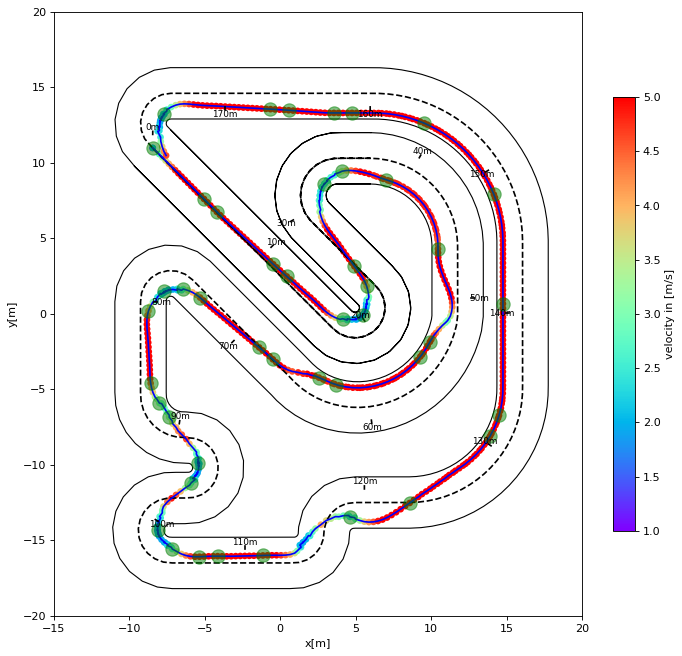

In [6]:
traj_actual = np.loadtxt("../result/triggering/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track2/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plot_traj(traj_actual, time_actual, 2)

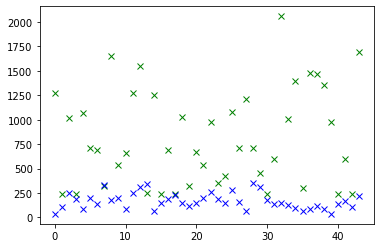

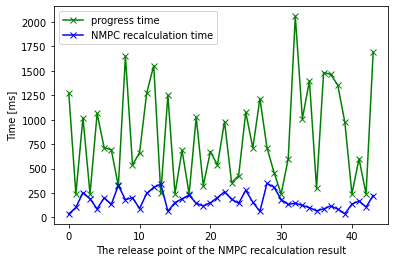

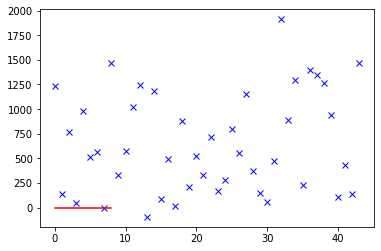

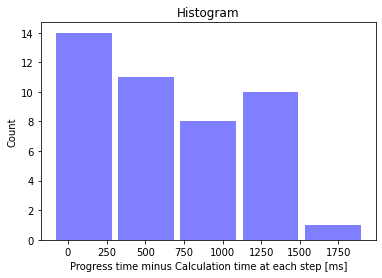

prog_t max:  2058.6526  - min:  239.98808  - avg:  819.4959
calc_t max:  347.975  - min:  36.109  - avg:  168.55621
iter_num max:  20.0  - min:  4.0  - avg:  8.772727


In [7]:
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual)

In [8]:
[print("step: ", i, ", iter num: ", e, ", KKT: ", time_actual[i][-1]) for i, e in enumerate(iter_num) if e > 15]
print("TOTAL recal num: ", time_actual.shape[0])
print("TOTAL computation time: ", sum(time_actual[:,0]))
print("lap time: ", traj_actual[-1])

step:  29 , iter num:  20.0 , KKT:  20.0
step:  30 , iter num:  20.0 , KKT:  20.0
TOTAL recal num:  46
TOTAL computation time:  7636.299018859863
lap time:  [180.         0.210883   0.217457   5.        -0.        -0.186501
  37.267487]
